In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # For rectangles
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats # For linregress (trends)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../../') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 252 GB / available: 225 GB / percent used: 10.8 %


# Check model data

In [2]:
path = '/ccc/store/cont003/thredds/mellull/LMDZOR/PROD/amip/CM6012-LR-amip-02'
path_guided = '/ccc/store/cont003/thredds/mellull/LMDZOR/PROD/amip/CM6012-LR-amip-G-02'

folder = 'ATM'
var_LMDZ = 'temp'
# var_LMDZ = 'ta'

In [3]:
xr.open_dataset(path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_'+var_LMDZ+'.nc')

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, lat: 143, lon: 144, presnivs: 79, time_counter: 192)
Coordinates:
  * lat                   (lat) float32 90.0 88.73239 ... -88.73239 -90.0
  * lon                   (lon) float32 -180.0 -177.5 -175.0 ... 175.0 177.5
  * presnivs              (presnivs) float32 101202.11 100942.43 ... 1.4834349
  * time_counter          (time_counter) object 1999-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_centered         (time_counter) object ...
Dimensions without coordinates: axis_nbounds
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) object ...
    aire                  (lat, lon) float32 ...
    temp                  (time_counter, presnivs, lat, lon) float32 ...
Attributes:
    name:                      histmth
    description:               Created by xios
    title:                     Created by xios
    Conventions:               CF-1.6
    timeStamp:                 2017-Oct-31 15:18:38 GMT
    uuid:                      edd88a50-9cee-4920-b578-60394b07505d
    LongName:                  LMDZOR configuration
    history:                   Wed Nov  1 16:38:41 2017: ncrcat -C --buffer_s...
    nco_openmp_thread_number:  1

In [4]:
temp = xr.open_dataset(path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_'+var_LMDZ+'.nc').temp.mean('time_counter').mean('lon').persist()

In [5]:
ta = xr.open_dataset(path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_ta.nc').ta.mean('time_counter').mean('lon').persist()

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


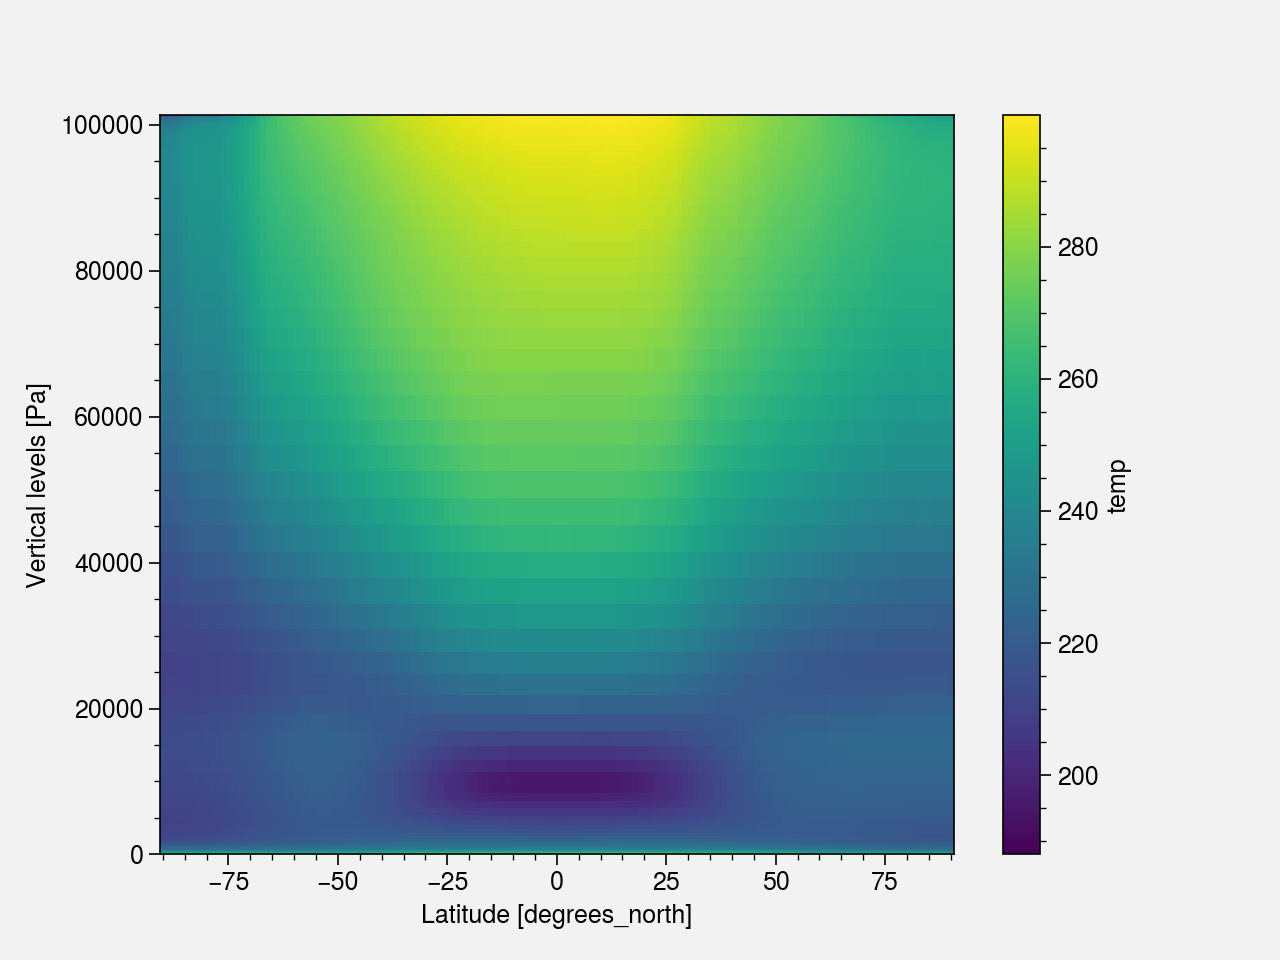

In [6]:
temp.plot()

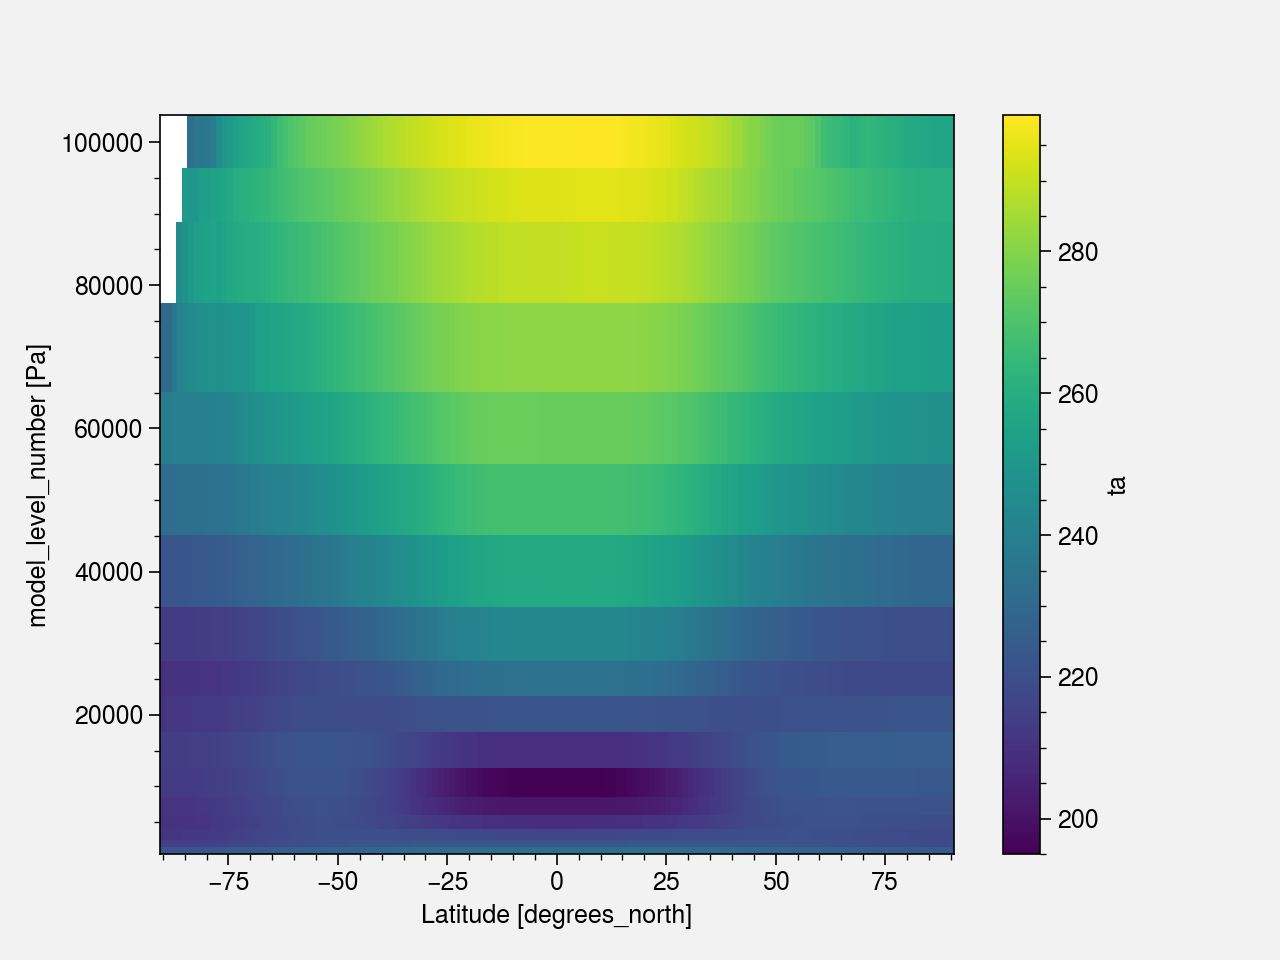

In [7]:
ta.plot()

In [8]:
temp.presnivs

<xarray.DataArray 'presnivs' (presnivs: 79)>
array([1.012021e+05, 1.009424e+05, 1.006534e+05, 1.003319e+05, 9.997420e+04,
       9.957655e+04, 9.913467e+04, 9.864384e+04, 9.809898e+04, 9.749448e+04,
       9.682430e+04, 9.608191e+04, 9.526024e+04, 9.435173e+04, 9.334834e+04,
       9.224155e+04, 9.102246e+04, 8.968182e+04, 8.821020e+04, 8.659811e+04,
       8.483623e+04, 8.291569e+04, 8.082840e+04, 7.856748e+04, 7.612779e+04,
       7.350645e+04, 7.070354e+04, 6.772281e+04, 6.457239e+04, 6.126538e+04,
       5.782047e+04, 5.426217e+04, 5.062074e+04, 4.693169e+04, 4.323469e+04,
       3.957199e+04, 3.598637e+04, 3.251885e+04, 2.920636e+04, 2.607983e+04,
       2.316271e+04, 2.047042e+04, 1.801036e+04, 1.578271e+04, 1.378158e+04,
       1.199642e+04, 1.041344e+04, 9.016865e+03, 7.790020e+03, 6.716147e+03,
       5.778999e+03, 4.963233e+03, 4.254644e+03, 3.640276e+03, 3.108450e+03,
       2.648733e+03, 2.251867e+03, 1.909687e+03, 1.615018e+03, 1.361581e+03,
       1.143891e+03, 9.571722e+02, 7.972696e+02, 6.605754e+02, 5.439607e+02,
       4.447146e+02, 3.604912e+02, 2.892627e+02, 2.292787e+02, 1.790303e+02,
       1.372198e+02, 1.027344e+02, 7.462312e+01, 5.207758e+01, 3.441441e+01,
       2.105668e+01, 1.150741e+01, 5.296797e+00, 1.483435e+00], dtype=float32)
Coordinates:
  * presnivs  (presnivs) float32 101202.11 100942.43 ... 5.296797 1.4834349
Attributes:
    name:           presnivs
    standard_name:  Vertical levels
    units:          Pa

In [9]:
ta.plev

<xarray.DataArray 'plev' (plev: 17)>
array([100000.,  92500.,  85000.,  70000.,  60000.,  50000.,  40000.,  30000.,
        25000.,  20000.,  15000.,  10000.,   7000.,   5000.,   3000.,   2000.,
         1000.], dtype=float32)
Coordinates:
  * plev     (plev) float32 100000.0 92500.0 85000.0 ... 3000.0 2000.0 1000.0
Attributes:
    name:           plev
    standard_name:  model_level_number
    units:          Pa

In [10]:
temp_interp = temp.interp(presnivs=(ta.plev.values), method='linear')
temp_interp

<xarray.DataArray 'temp' (presnivs: 17, lat: 143)>
array([[256.1361 , 255.84094, 255.99927, ..., 234.13255, 232.94049,
        232.59496],
       [260.2027 , 260.21454, 260.27295, ..., 240.62564, 239.65477,
        239.346  ],
       [259.27835, 259.23972, 259.2911 , ..., 238.85356, 238.04796,
        237.9151 ],
       ...,
       [218.088  , 217.83861, 217.8544 , ..., 211.14261, 211.08504,
        211.16045],
       [218.70497, 218.4315 , 218.44275, ..., 213.79675, 213.74643,
        213.829  ],
       [224.07188, 223.79485, 223.81189, ..., 222.23174, 222.19878,
        222.29686]], dtype=float32)
Coordinates:
  * lat       (lat) float32 90.0 88.73239 87.46479 ... -87.46479 -88.73239 -90.0
  * presnivs  (presnivs) float32 100000.0 92500.0 85000.0 ... 2000.0 1000.0

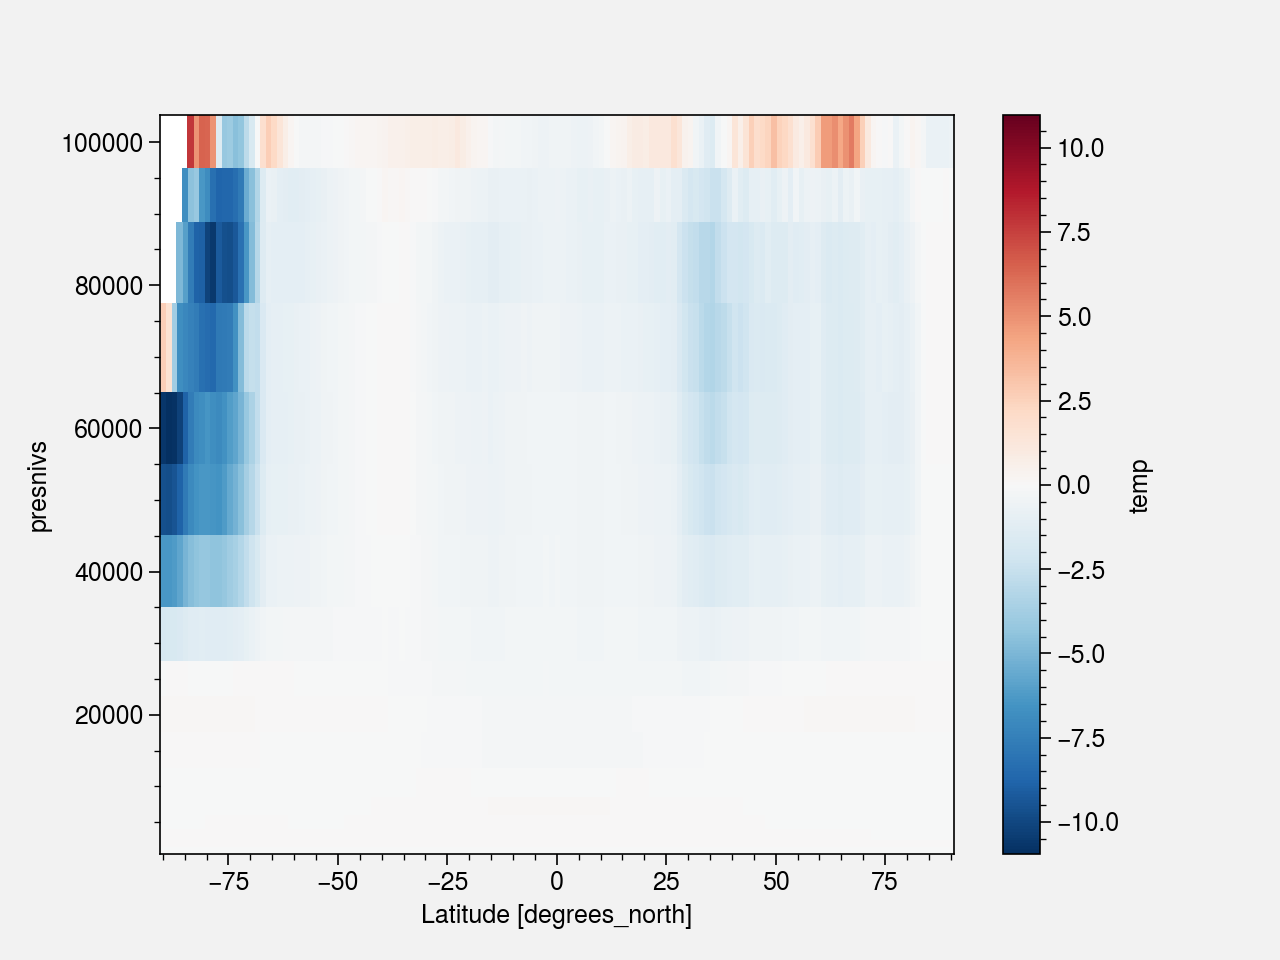

In [11]:
(temp_interp - ta.values).plot()